# DIVI-Plot
Plots the DIVI Intensivregister data
## Imports, Definitions

In [1]:
from sys import exit
import matplotlib.pyplot as plt
import datetime as dt
import dateutil.relativedelta as du
import numpy as np
import pandas as pd

TDPATH = 'https://diviexchange.blob.core.windows.net/%24web/zeitreihe-tagesdaten.csv'

DARMSTADT            = 6411
FRANKFURT_AM_MAIN    = 6412
OFFENBACH_AM_MAIN    = 6413
WIESBADEN            = 6414
BERGSTRASSE          = 6431
DARMSTADT_DIEBURG    = 6432
GROSS_GERAU          = 6433
HOCHTAUNUSKREIS      = 6434
MAIN_KINZIG_KREIS    = 6435
MAIN_TAUNUS_KREIS    = 6436
ODENWALDKREIS        = 6437
OFFENBACH_KREIS      = 6438
RHEINGAU_TAUNUS_KREIS = 6439
WETTERAUKREIS        = 6440
GIESSEN              = 6531
LAHN_DILL_KREIS      = 6532
LIMBURG_WEILBURG     = 6533
MARBURG_BIEDENKOPF   = 6534
VOGELSBERGKREIS      = 6535
KASSEL               = 6611
FULDA                = 6631
HERSFELD_ROTENBURG   = 6632
KASSEL_KREIS         = 6633
SCHWALM_EDER_KREIS   = 6634
WALDECK_FRANKENBERG  = 6635
WERRA_MEISSNER_KREIS = 6636


HOCHTAUNUSKREIS = 6434
GEMEINDEN = [HOCHTAUNUSKREIS]

STARTDATE = '2021-03-01'

debugTable = False

## Open DIVI CSV File

In [2]:

# divi = pd.read_csv(dataFile, parse_dates=["date"])
divi=pd.read_csv(TDPATH, parse_dates=["date"])

if debugTable:
    divi.info()

## File Structure
### csv contents

Data columns (total 11 columns):

| #   | Spalte | Dtype  | Beispiel 1   | Beispiel 2   | Beispiel 3   |
|----:|:-------|:-------|:------------:|:------------:|:------------:|
|  0  | date   | datetime64[ns] | '2020-04-24' | '2020-04-25' | '2020-04-26' | 
|  1  | bundesland | int64 | 6 | 6 | 6 |
|  2  | gemeindeschluessel | int64 | 6463 | 6463 | 6463 |
|  3  | anzahl_standorte   | int64 | 3 | 3 | 3 |
|  4  | anzahl_meldebereiche | int64 | 3 | 3 | 3 |
|  5  | faelle_covid_aktuell | int64 | 5 | 4 | 6 |
|  6  | faelle_covid_aktuell_invasiv_beatmet | int64 | 1 | 1 | 2 |
|  7  | betten_frei | int64 | 4| 4 | 3 |
|  8  | betten_belegt  | int64 | 28| 27 | 27 |
| 10  | betten_belegt_nur_erwachsen  | int64 | 28| 27 | 27 |
|  9  | betten_frei_nur_erwachsen | int64 | 4| 4 | 3 

# Filter Only Interesting Rows
Since March 2021, a new counting method has been used to determine the occupancy of intensive care units. Whereas previously the beds in the intensive care units were counted, since this date it has been the beds in intensive care units for which sufficient intensive care staff are available on site: ```divi['date'] > 2021/03/01```

For now, we are only interested in data from Hochtaunuskreis: ```divi["gemeindeschluessel"] == 6434```. This may be adapted in the future.

In [3]:
dMin = pd.to_datetime(STARTDATE)
toPlot = divi[divi["gemeindeschluessel"].isin(GEMEINDEN) & (divi["date"] > dMin)]


## Plot Data
This plot contains DIVI data for Hochtaunuskreis only.

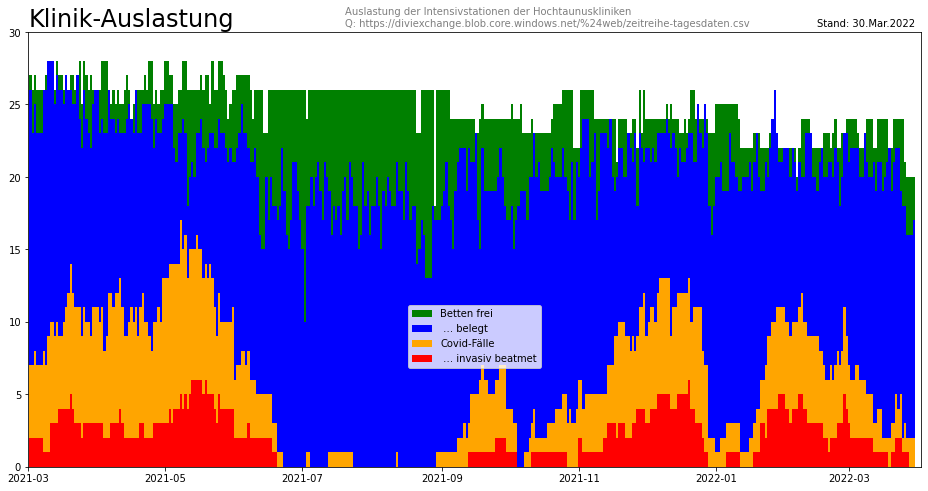

In [4]:
plt.close("all")

plt.rcParams["figure.figsize"] = (16,8)

fig, ax = plt.subplots()

p2 = ax.bar(toPlot['date'], toPlot['betten_frei'], 1.0, bottom=toPlot['betten_belegt'], label='Betten frei', color = 'green')
p1 = ax.bar(toPlot['date'], toPlot['betten_belegt'], 1.0, label=' … belegt', color = 'blue')

p4 = ax.bar(toPlot['date'], toPlot['faelle_covid_aktuell'], 1.0, bottom=toPlot['faelle_covid_aktuell_invasiv_beatmet'], label='Covid-Fälle', color = 'orange')
p3 = ax.bar(toPlot['date'], toPlot['faelle_covid_aktuell_invasiv_beatmet'], 1.0, label=' … invasiv beatmet', color = 'red')

dMax = divi['date'].max()
mMax = dMax + pd.DateOffset(days=3)
plt.title("Klinik-Auslastung", fontsize=24, loc='left')
plt.xlim(left=dMin, right=mMax)
plt.ylim(top=30)
leg = ax.legend(loc='center', bbox_to_anchor=(0.5, 0.30), frameon=True)
plt.figtext(0.81, 0.89, "Stand: " + pd.to_datetime(dMax).strftime('%d.%b.%Y'))
plt.figtext(0.4, 0.89, "Auslastung der Intensivstationen der Hochtaunuskliniken\nQ: " + TDPATH, color='gray')

plt.show()


## Plot neighbors


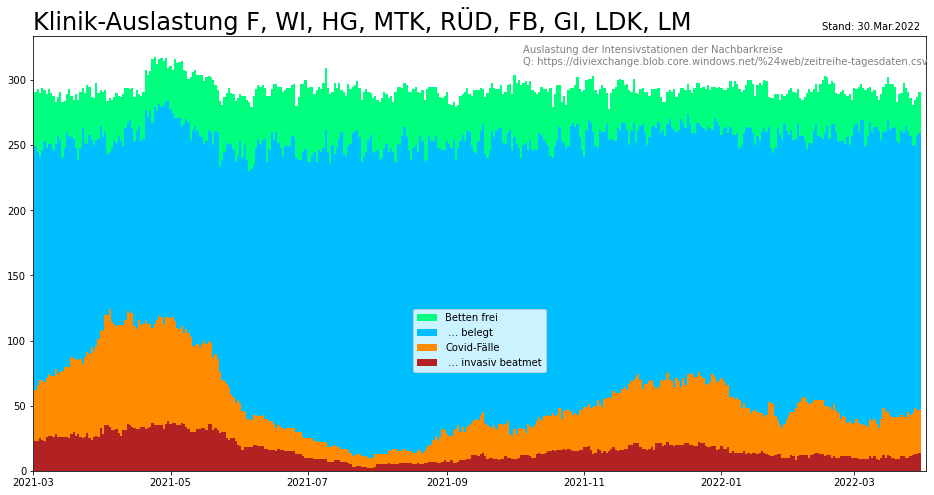

In [5]:
NACHBARN=[ FRANKFURT_AM_MAIN, WIESBADEN, HOCHTAUNUSKREIS, MAIN_TAUNUS_KREIS, RHEINGAU_TAUNUS_KREIS, WETTERAUKREIS,
           GIESSEN, LAHN_DILL_KREIS, LIMBURG_WEILBURG]
toPlot = divi[divi["gemeindeschluessel"].isin(NACHBARN) & (divi["date"] > dMin)]

plt.close("all")

plt.rcParams["figure.figsize"] = (16,8)

fig, ax = plt.subplots()

p2 = ax.bar(toPlot['date'], toPlot['betten_frei'], 1.0, bottom=toPlot['betten_belegt'], label='Betten frei', color = 'springgreen')
p1 = ax.bar(toPlot['date'], toPlot['betten_belegt'], 1.0, label=' … belegt', color = 'deepskyblue')

p4 = ax.bar(toPlot['date'], toPlot['faelle_covid_aktuell'], 1.0, bottom=toPlot['faelle_covid_aktuell_invasiv_beatmet'], label='Covid-Fälle', color = 'darkorange')
p3 = ax.bar(toPlot['date'], toPlot['faelle_covid_aktuell_invasiv_beatmet'], 1.0, label=' … invasiv beatmet', color = 'firebrick')

dMax = divi['date'].max()
mMax = dMax + pd.DateOffset(days=3)
plt.title("Klinik-Auslastung F, WI, HG, MTK, RÜD, FB, GI, LDK, LM", fontsize=24, loc='left')
plt.xlim(left=dMin, right=mMax)
# plt.ylim(top=30)
leg = ax.legend(loc='center', bbox_to_anchor=(0.5, 0.30), frameon=True)
plt.figtext(0.81, 0.89, "Stand: " + pd.to_datetime(dMax).strftime('%d.%b.%Y'))
plt.figtext(0.55, 0.83, "Auslastung der Intensivstationen der Nachbarkreise\nQ: " + TDPATH, color='gray')

plt.show()